# Machine Learning: Clustering

### Main steps carried out:
#### 1. Import libraries
#### 2. Import Data
#### 3. The elbow techniques
#### 4. K-means clustering

#### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [3]:
# Created charts are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [4]:
# Creating a path for faster import and export
path=r"C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 14-15\2023-10-09 Airbnb Amsterdam"

In [5]:
# Set the color palette to "RuBu"
sns.set_palette("RdBu")

#### 2. Import Data

In [6]:
# Import datafarme
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data_MLR.csv'), index_col = False)

In [7]:
# Output check
df.shape

(8386, 16)

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_groups
0,0,0,761411,4013546,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2.30,2,272,26,Averagely Low Price
1,1,1,768274,3678216,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,0.64,1,16,6,Increased Price
2,2,2,768737,3877342,Westerpark,52.37824,4.86826,Private room,109,2,341,2.73,3,29,43,Averagely Low Price
3,3,3,771217,4068486,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,0.11,1,0,0,Increased Price
4,4,4,771343,2313061,Centrum-West,52.37641,4.88303,Private room,150,1,699,6.62,2,196,110,Average Price


In [9]:
# k-means algorithm can only handle numerical variables
# remove any categorical columns from your data1
df = df[['number_of_reviews','price','availability_365','minimum_nights','reviews_per_month','number_of_reviews_ltm','id']]

In [10]:
df.head()

,number_of_reviews,price,availability_365,minimum_nights,reviews_per_month,number_of_reviews_ltm,id
0,303,61,272,3,2.30,26,761411
1,78,327,16,3,0.64,6,768274
2,341,109,29,2,2.73,43,768737
3,10,290,0,3,0.11,0,771217
4,699,150,196,1,6.62,110,771343


In [11]:
#  Rename some columns in the imported dataframe to make it easier to type out syntax
df.rename(columns = {'number_of_reviews' : 'Reviews number', 'price':'Price', 'availability_365': 'Availability in days','minimum_nights' : 'Min. Nights', 'reviews_per_month': 'Reviews per Month', 'number_of_reviews_ltm': 'Reviews in 12 Months'}, inplace = True)

#### 3. The elbow techniques

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

C:\Users\olilo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\olilo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\olilo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\olilo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-1.2791668378311614e+39,
 -4.511394019736503e+37,
 -9.786908321783302e+36,
 -4.615693625012906e+36,
 -2.779051420926699e+36,
 -1.7986062359187565e+36,
 -1.2390170841671548e+36,
 -9.006036016866519e+35,
 -7.193967594105019e+35]

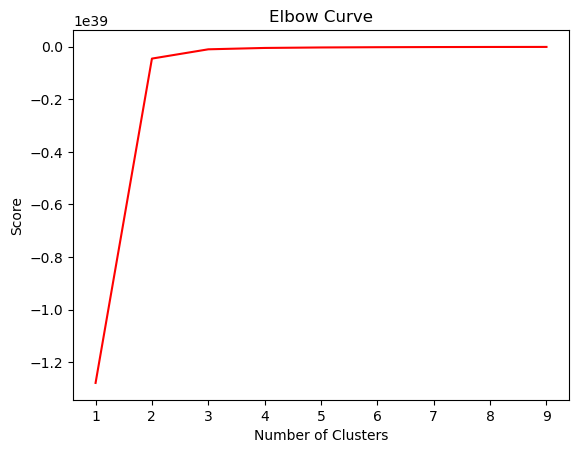

In [14]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score,color='red')

pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

pl.show()

The elbow, are the breaking point of the curve, in this case till the Number od Clustters 5. This is read from the chart, the number 5 is the last point that eliminates the pointed growth. Then the line becomes smoother.

#### 4. K-means clustering

In [15]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 5) 

In [16]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\olilo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [17]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs
df['clusters'] = kmeans.fit_predict(df)

C:\Users\olilo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# Output check 
df.head()

,Reviews number,Price,Availability in days,Min. Nights,Reviews per Month,Reviews in 12 Months,id,clusters
0,303,61,272,3,2.30,26,761411,0
1,78,327,16,3,0.64,6,768274,0
2,341,109,29,2,2.73,43,768737,0
3,10,290,0,3,0.11,0,771217,0
4,699,150,196,1,6.62,110,771343,0


In [19]:
# New “clusters” column
df['clusters'].value_counts(dropna = False, ascending=True)

clusters
1     595
4     724
2     759
3    1070
0    5238
Name: count, dtype: int64

In [20]:
# Define the name of the color palette as a string
palette_name = '#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5'

# Get the color palette
colors = sns.color_palette(palette_name)

# Convert the colors to hexadecimal values and print them
hex_colors = [color for color in colors.as_hex()]
print(hex_colors)


['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5']


C:\Users\olilo\AppData\Local\Temp\ipykernel_3416\477833655.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.scatterplot(x=df['Price'], y=df['Availability in days'], hue=kmeans.labels_, s=100, palette=colors)


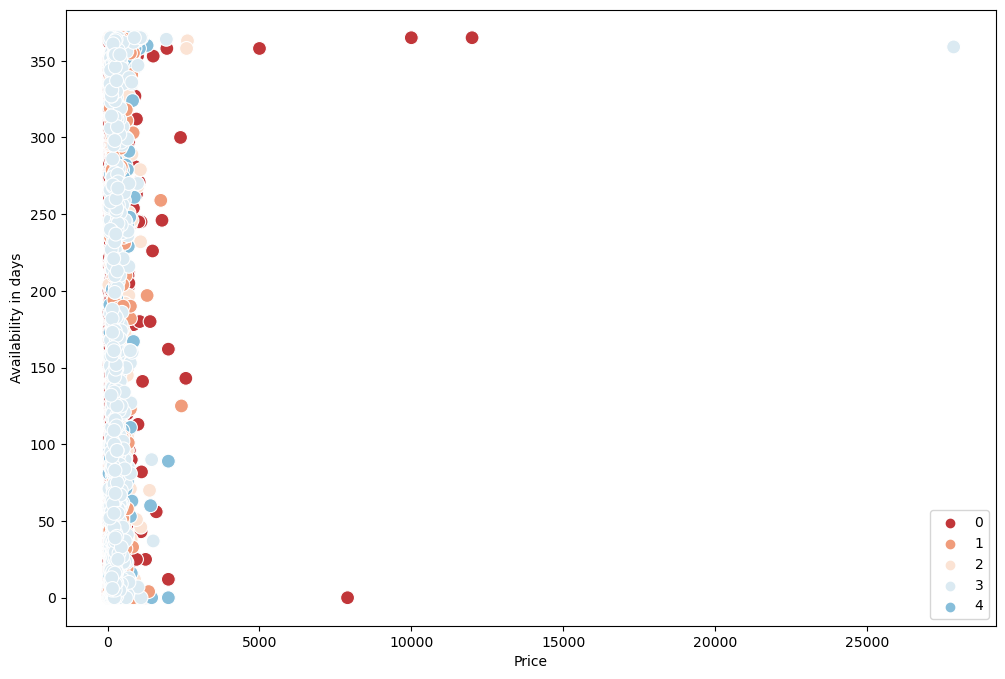

In [21]:
# Plot the clusters for the 'Price' and 'Availability in days' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price'], y=df['Availability in days'], hue=kmeans.labels_, s=100, palette=colors) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Availability in days') # Label y-axis.
plt.show()

The first scatterplot shows the price and availability columns of the property in the year. Most points, regardless of color, are focused on the y axis and have a maximum value of up to 5000. Several points and color groups 1 and 2 cover the entire scale and number over 5000. These are outliners.

C:\Users\olilo\AppData\Local\Temp\ipykernel_3416\2716832769.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.scatterplot(x=df['Reviews in 12 Months'], y=df['Reviews number'], hue=kmeans.labels_, s=100, palette=colors)


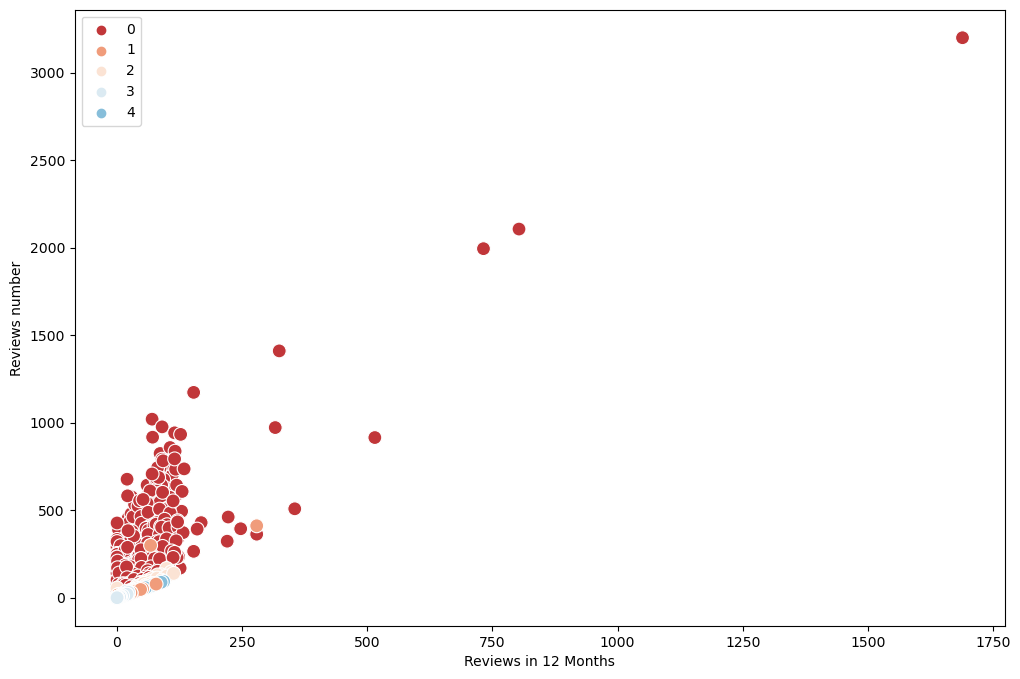

In [22]:
# Plot the clusters for the 'Reviews in 12 Months' and Reviews number' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Reviews in 12 Months'], y=df['Reviews number'], hue=kmeans.labels_, s=100, palette=colors) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Reviews in 12 Months') # Label x-axis.
plt.ylabel('Reviews number') # Label y-axis.
plt.show()

The next scatterplot shows the Reviews in 12 Months column against the 'Reviews number'.
The group of light pink dots covers most of the chart, and is the only consistent location on the entire scale for 12 month revisions. The rest of the points are grouped with x asis value around 200.

C:\Users\olilo\AppData\Local\Temp\ipykernel_3416\58136777.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.scatterplot(x=df['Min. Nights'], y=df['Availability in days'], hue=kmeans.labels_, s=100, palette=colors)


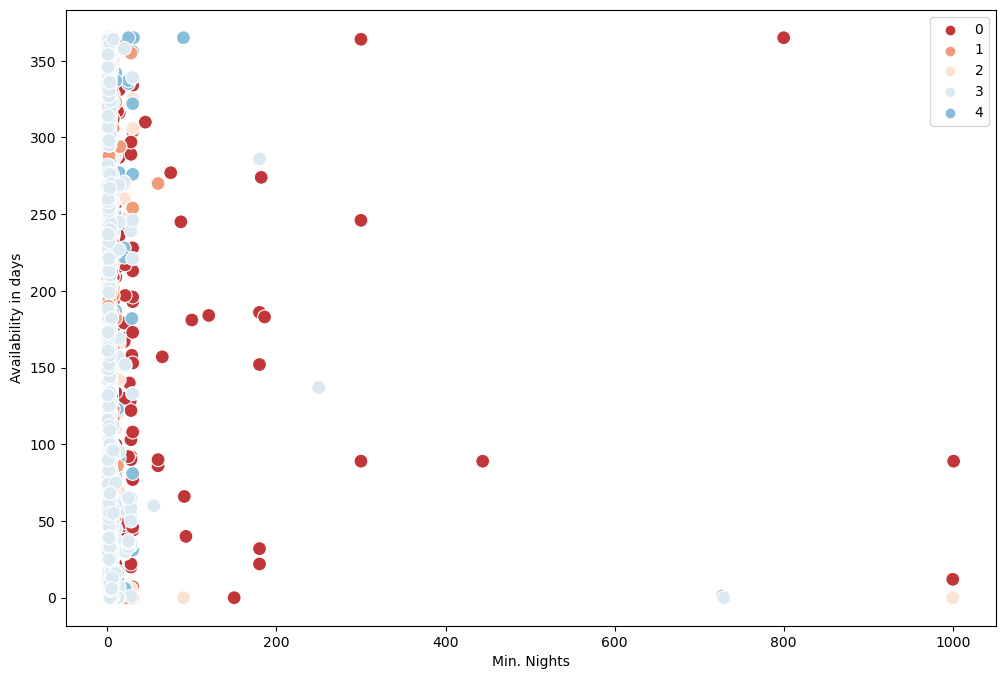

In [23]:
# Plot the clusters for the "Min. Nights" and "vailability in days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Min. Nights'], y=df['Availability in days'], hue=kmeans.labels_, s=100, palette=colors) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Min. Nights') # Label x-axis.
plt.ylabel('Availability in days') # Label y-axis.
plt.show()

The third chart is the minimum number of nights in relation to the number of nights when the premises are available. A grouping of close together light pink and purple dots is visible. Most, apart from a few outliners, were located close to the number 50 on the x axis.

What can these results be used for?
Inconsistency across clusters can be used to detect anomalies. If some data points in a cluster deviate significantly from the cluster mean or median, this may signal unusual cases that require further investigation. Thanks to this, we can change the direction of the analysis, develop new hypotheses and help clients understand the data.
The division was into five groups. Outliners have an influence on the group and it is visible. There is also a lack of dependency in some cases, or even a slight one. 

In [24]:
# Create a column that renames the clusters to colors 
df.loc[df['clusters'] == 4, 'cluster'] = 'navy'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [25]:
# Calculate the descriptive statistics
df.groupby('cluster').agg({
    'Reviews in 12 Months':['mean','median'],
    'Availability in days':['mean','median'],
    'Reviews number':['mean','median'],
    'Price':['mean','median'],
    'Min. Nights':['mean','median']})

Reviews in 12 Months        Availability in days         \
                            mean median                 mean median   
cluster                                                               
dark purple             1.791589    1.0            98.985047   50.0   
light pink             14.056701    3.0            74.490645    7.0   
navy                    7.780387    4.0           103.187845   31.0   
pink                    5.978151    3.0            96.682353   38.0   
purple                  8.216074    4.0            87.274045   20.0   

            Reviews number              Price        Min. Nights         
                      mean median        mean median        mean median  
cluster                                                                  
dark purple       1.830841    1.0  301.987850  246.5    4.518692    3.0  
light pink       68.837342   23.0  232.558801  191.0    5.443681    3.0  
navy              7.842541    4.0  283.348066  240.0    3.520718    3.0  
pink              6.613445    3.0  285.436975  239.0    3.205042    3.0  
purple           11.724638    7.0  287.092227  244.0    5.949934    3.0

Conclusions from the table
Based on these statistics, the light pink color group in the table looks good taking into account all categories.

The differences between the median and mean in each group are very high. The closest ones are in the Reviews in 12 Months and Min. Nights columns.

This indicates high variability in virtually every group.

Availability in days shows extreme differences in mean, looking at each color group. The arithmetic mean between the dark purple and purple groups is more than 360. This indicates a significant difference.

Min. Nights columna has the closest values in each color group.

Overall, the results of cluster analysis can form the basis for a wide range of applications and decision-making processes in various fields, including business, marketing, public policy, investment and even city infrastructure development.

In [26]:
# Save the data as an Excel file
df.to_excel('df.xlsx')

In [27]:
# Export data
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data_mlc.csv'))